# Here, we will briefly see word embeddings and use spacy for that.
# We will also try to see the contextual relationship and similarity between tokens.

# I also have listed the libraries required for this exercise, I have commented it out as its already installed in mine.

In [1]:
#!python -m spacy download en_core_web_md

import spacy

In [3]:
# Load a trained word embedding

nlp = spacy.load('en_core_web_md')

# en_core_web_md is the name of the trained vector embedding... Similarly there are even en_core_web_sm and more, also in other languages if you wish to.

nlp

In [4]:
# Sample example sentence

lines =  ['The black cat sat on the couch and the brown dog slept on the rug.']

In [5]:
# Get the embeddings for the example sentence

doc = nlp(lines[0])

doc

The black cat sat on the couch and the brown dog slept on the rug.

# Visualization

In [6]:
# Assign the embeddings from black and brown token
black = doc[1]
brown = doc[9]

# Compare the similarity between black and brown
black.similarity(brown)

# saw a similarity of 73% between black and brown , obviously because they are of the color space.

0.7308038

# Visualize word embeddings

In [7]:
# !pip install whatlies --quiet

# whatlies library provides a great support for the visualization of word embeddings

from whatlies.language import SpacyLanguage

/Users/smanjil/.virtualenvs/transformers/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [8]:
# initialize a language model with the pre-trained spacy word embedding

language_model = SpacyLanguage(nlp)

language_model

SpacyLanguage(nlp=<spacy.lang.en.English object at 0x108acb760>)

In [9]:
# get all the noun chunks from the trained token list

n_chunks = list(doc.noun_chunks)
n_chunks

[The black cat, the couch, the brown dog, the rug]

In [10]:
# we saw 4 noun chunks.
# Similarity in noun chunks

n_chunks[0].similarity(n_chunks[1])

0.6707564

In [11]:
# the black cat and the brown dog are more similar because of two spaces here, color and animal
# only for the color black and brown we saw 73% before.
# so, we can conclude more contextual similarity given more texts or context

n_chunks[0].similarity(n_chunks[2])

0.87942845

In [12]:
# now, we move to actulally plot the embeddings, for this we need only the text but not the spacy token object.

# get only plain text from the n_chunks
n_chunks = [n_chunk.text for n_chunk in n_chunks]

# Retrieve embeddings for items in list n_chunks
# and store the result under embeddings

embeddings = language_model[n_chunks]

embeddings

EmbSet

# We continue to visualize the embeddings and see how close the noun chunks are with each other.

EmbSet

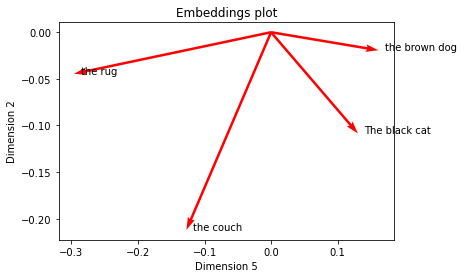

In [13]:
# plot the embeddings
# this is the general plot which we see in various nlp papers or websites explaining word embedding relationship.

embeddings.plot(kind='arrow', color='red', x_axis=5, y_axis=2, title='Embeddings plot')

# as before, we saw (the black cat) and (the brown dog) were 87% similar, we will find it near to each other.
# for more clarity, you can further also see the similarity between other chunks like (the black cat) and (the couch) and so on.

# Interactive visualization
# this is more like you can interactively see the relationship, may be even try changing the value of axis and see how the position changes.

In [15]:
embeddings.plot_interactive(x_axis=5, y_axis=2, title='Embeddings plot')

alt.LayerChart(...)

ImportError: cannot import name '_png' from 'matplotlib' (/usr/local/lib/python3.7/dist-packages/matplotlib/__init__.py)
# so this was just the basics towards the understanding, and there is much more. I hope you will continue exploring and larning.
# This was also towards exploring a book named "Transformers: NLP"

# In the future, you will be receiving a lot more as I continue to explore the book. So, keep exploring. Cheers!